In [ ]:
# this is for question one

In [219]:
import pandas as pd
import numpy as np
import calendar
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

reg1 = re.compile(r'[0-9][0-9][]0-9][0-9]-[0-9][0-9]-[]0-9][0-9]')

# convert '2018-02-15 1:40' to 'February'
def change_to_month (create_time):
    result = reg1.search(str(create_time)).group().split('-')[1]
    if result[0] == '0':
        month_number = result[1]
    else:
        month_number = result
    month = calendar.month_name[int(month_number)]
    return month


In [220]:
# create dataframe from csv files
PATH = 'C:/temp6/Assessment/ACE/'
df_spec = pd.read_csv(PATH + 'acereport_specialty.csv')
df_read = pd.read_csv(PATH + 'raw_reads.csv')

# add [Month] column to df_read dataframe
df_read['Month'] = df_read[['CreatedDate']].apply(change_to_month, axis=1)

# rename df_spec columns
df_spec.columns = ['AceReportId', 'Specialty']

# merge df_read and df_spec dataframe
df_merge = pd.merge (df_read, df_spec, on='AceReportId')
df_merge.head(15)

,AceReportId,UserId,CreatedDate,Month,Specialty
0,362,8b05e5f8-94e9-421b-9370-3b7a26094de2,2018-01-01 6:19,January,Trauma
1,362,2119,2018-04-01 17:53,April,Trauma
2,362,c835fe69-6f05-4014-b330-39f827740216,2018-04-30 2:26,April,Trauma
3,362,11357,2018-05-02 18:23,May,Trauma
4,362,34398,2018-05-04 13:58,May,Trauma
5,362,36567,2018-05-06 0:07,May,Trauma
6,362,03e32379-736a-4641-85e9-279fdd8399b1,2018-10-01 1:53,October,Trauma
7,7578,a93a2f16-aa19-4387-9ba3-e5ceeb1a59a2,2018-01-01 12:23,January,Arthroplasty
8,7578,a54d43a9-1c7e-4d39-aff5-56e7de918a98,2018-02-16 6:09,February,Arthroplasty
9,7578,38524,2018-02-18 11:06,February,Arthroplasty


In [290]:
# create a dataframe with 3 top users
df_user = df_merge.groupby(['UserId']).count()
df_user.sort_values(by='CreatedDate', ascending=False, inplace=True)

df_topuser_index = df_user.head(3).index.get_level_values(0).values
df_topUsers = pd.DataFrame({'UserId': df_topuser_index[0:]})
df_topUsers

,UserId
0,21221
1,d86064c9-f9dd-4193-94a3-ed7b9f86dd38
2,20f3727b-dea3-4189-8b55-4173bc3282b1


In [257]:
# get 3 top readers' reads by month and speciality
df_topUserDetail=pd.merge (df_topUsers,df_merge, on='UserId', how='left') 
df_3users= df_topUserDetail.groupby(['UserId','Specialty', 'Month']).count().reset_index()

# userId is too long. make it short
user_map={'20f3727b-dea3-4189-8b55-4173bc3282b1':'user_1','21221':'user_2','d86064c9-f9dd-4193-94a3-ed7b9f86dd38':'user_3'}
df_3users['UserSimpleId'] = df_3users['UserId'].map(user_map)
df_3users

,UserId,Specialty,Month,AceReportId,CreatedDate,UserSimpleId
0,20f3727b-dea3-4189-8b55-4173bc3282b1,Arthroplasty,April,14,14,user_1
1,20f3727b-dea3-4189-8b55-4173bc3282b1,Arthroplasty,August,1,1,user_1
2,20f3727b-dea3-4189-8b55-4173bc3282b1,Arthroplasty,February,2,2,user_1
3,20f3727b-dea3-4189-8b55-4173bc3282b1,Arthroplasty,July,170,170,user_1
4,20f3727b-dea3-4189-8b55-4173bc3282b1,Arthroplasty,June,18,18,user_1
5,20f3727b-dea3-4189-8b55-4173bc3282b1,Arthroplasty,March,3,3,user_1
6,20f3727b-dea3-4189-8b55-4173bc3282b1,General Orthopaedics,July,1,1,user_1
7,20f3727b-dea3-4189-8b55-4173bc3282b1,General Orthopaedics,March,1,1,user_1
8,20f3727b-dea3-4189-8b55-4173bc3282b1,Osteoarthritis,July,2,2,user_1
9,20f3727b-dea3-4189-8b55-4173bc3282b1,Osteoarthritis,June,1,1,user_1


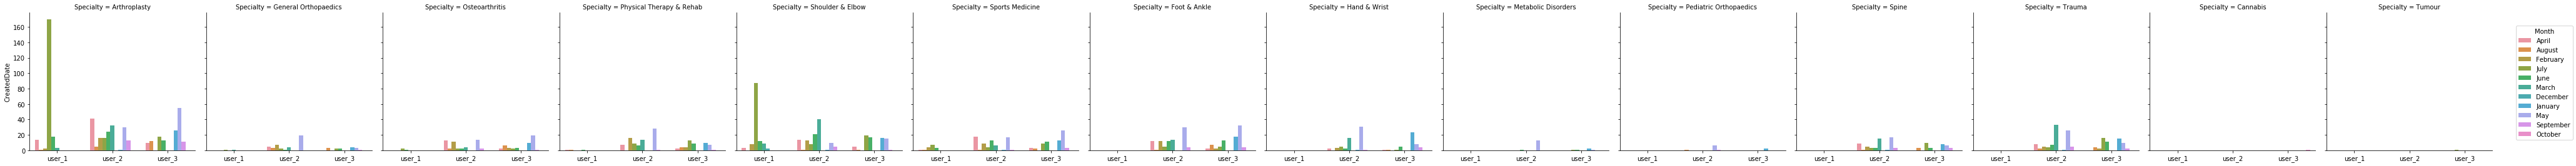

In [258]:
fg = sns.factorplot(x='UserSimpleId', y='CreatedDate', hue='Month', 
                        col='Specialty', data=df_3users, kind='bar')
#fg.set_xticklabels(rotation=30)
fg.set_xlabels('')

In [ ]:
# the following is for question 2

In [ ]:
# A: figure out reads of specialities again months, e.g.,  find which speciality was read the most in a certain month

In [249]:
# A contintue
# Make graph
df_month_speciality = df_merge.groupby(['Month', 'Specialty']).count().reset_index()
#df_month_speciality.sort_values(by='CreatedDate', ascending=False)
df_month_speciality.head(15)

,Month,Specialty,AceReportId,UserId,CreatedDate
0,April,Arthroplasty,1719,1716,1719
1,April,Foot & Ankle,546,546,546
2,April,General Orthopaedics,216,216,216
3,April,Hand & Wrist,190,190,190
4,April,Metabolic Disorders,16,16,16
5,April,Osteoarthritis,634,632,634
6,April,Pediatric Orthopaedics,48,48,48
7,April,Physical Therapy & Rehab,412,412,412
8,April,Shoulder & Elbow,1453,1452,1453
9,April,Spine,300,299,300


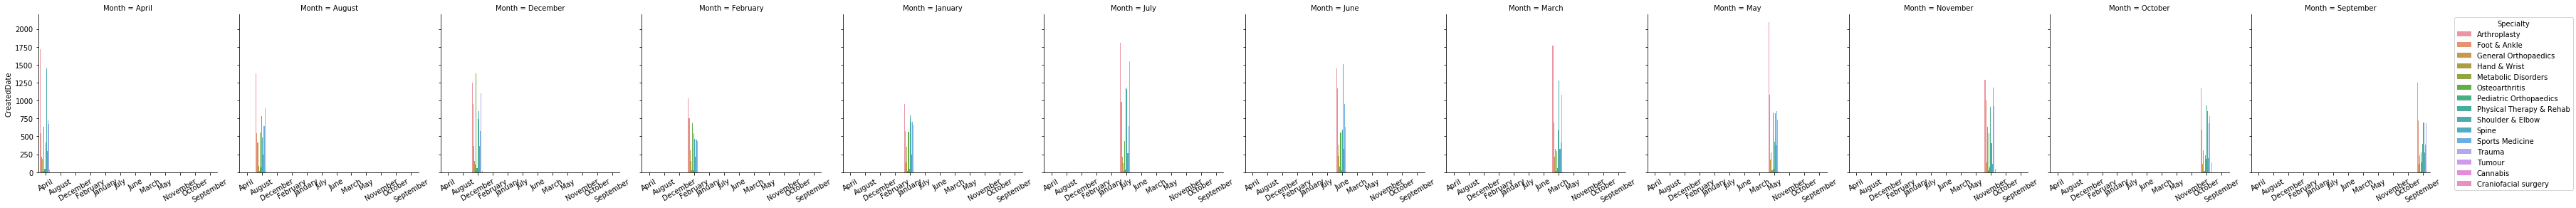

In [278]:
fgA = sns.factorplot(x='Month', y='CreatedDate',col='Month',hue='Specialty', data=df_month_speciality, kind='bar')
fgA.set_xticklabels(rotation=30)
fgA.set_xlabels('')

In [268]:
# B: find sum of read times for each month
df_reads_month = df_merge.groupby(['Month']).count().reset_index()
df_reads_month

,Month,AceReportId,UserId,CreatedDate,Specialty
0,April,6973,6965,6973,6973
1,August,6125,6125,6125,6125
2,December,7933,7933,7933,7933
3,February,5108,5098,5108,5108
4,January,5745,5736,5745,5745
5,July,8419,8419,8419,8419
6,June,7917,7913,7917,7917
7,March,7048,7032,7048,7048
8,May,7755,7751,7755,7755
9,November,7311,7311,7311,7311


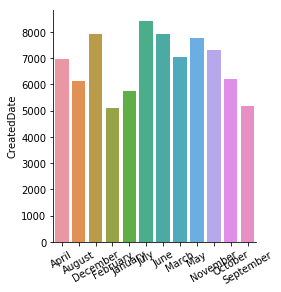

In [279]:
# B Continue
fgB = sns.factorplot(x='Month', y='CreatedDate', data=df_reads_month, kind='bar')
fgB.set_xticklabels(rotation=30)
fgB.set_xlabels('')


In [277]:
# C: find which speicality has the most readers for the whole time for test
df_speciality =  df_merge.groupby(['Specialty']).count().reset_index()
df_speciality

,Specialty,AceReportId,UserId,CreatedDate,Month
0,Arthroplasty,17155,17144,17155,17155
1,Cannabis,201,201,201,201
2,Craniofacial surgery,1,1,1,1
3,Foot & Ankle,9627,9624,9627,9627
4,General Orthopaedics,2623,2623,2623,2623
5,Hand & Wrist,3238,3232,3238,3238
6,Metabolic Disorders,386,386,386,386
7,Osteoarthritis,6994,6988,6994,6994
8,Pediatric Orthopaedics,807,805,807,807
9,Physical Therapy & Rehab,8289,8282,8289,8289


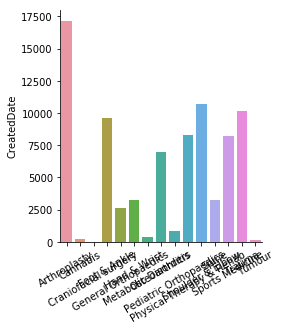

In [286]:
# C continue
# make graph
fgC = sns.factorplot(x='Specialty', y='CreatedDate', data=df_speciality, kind='bar')
fgC.set_xticklabels(rotation=30)
fgC.set_xlabels('')

In [283]:
# End